In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [364]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [365]:
in_path = Path('../data/raw')
out_path = Path('../data/interim')

In [366]:
df = pd.read_csv(in_path / 'properties_cleaned_v2.csv')

In [367]:
df.shape

(5933, 23)

In [368]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9313.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16049.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5666.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


In [369]:
df.shape

(5933, 23)

In [370]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

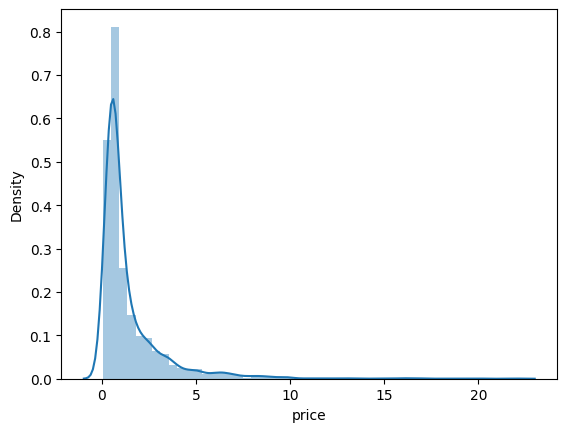

In [371]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

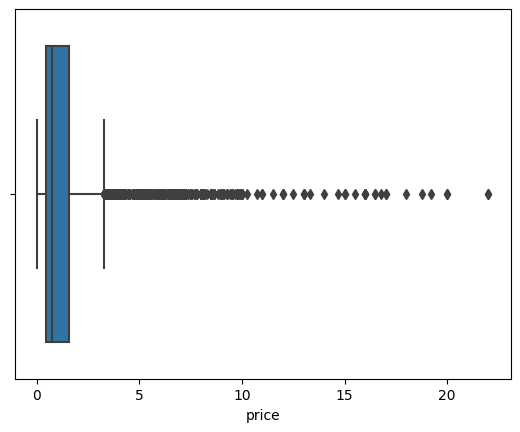

In [372]:
sns.boxplot(x=df['price'])

In [373]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(624,
 count    624.000000
 mean       5.803942
 std        2.925587
 min        3.300000
 25%        3.790000
 50%        5.000000
 75%        6.630000
 max       22.000000
 Name: price, dtype: float64)

In [374]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3664,house,anurita bungalows,thaltej,22.00,298507.0,737.0,Plot area 1100(102.19 sq.m.)Carpet area: 737 s...,4,4,3,2.0,East,Under Construction,NaN,NaN,737.0,1,0,1,1,0,0,200
5067,house,on request,science city,22.00,21256.0,10350.0,Plot area 1400(1170.58 sq.m.)Built Up area: 13...,5,4,3,2.0,North-East,Relatively New,NaN,1300.0,1150.0,1,1,1,1,0,1,96
136,house,individual bunglow,science city,20.00,19324.0,10350.0,Plot area 1378(1152.18 sq.m.)Carpet area: 1150...,5,5,2,2.0,North,Relatively New,NaN,NaN,1150.0,1,1,1,1,0,1,98
2781,house,neelkanth greens villa,thaltej,20.00,12005.0,16660.0,Plot area 1851(1547.67 sq.m.)Built Up area: 70...,4,4,1,3.0,East,Moderately Old,NaN,700.0,NaN,0,0,1,1,0,1,105
1619,flat,ikebana,bodakdev,19.20,12000.0,16000.0,Super Built up area 16000(1486.45 sq.m.),6,7,2,19.0,East,Under Construction,16000.0,NaN,NaN,1,1,1,1,0,0,253
4664,house,navratna kalhaar bungalows,shilaj,18.75,13889.0,13500.0,Plot area 1500(1254.19 sq.m.)Built Up area: 56...,4,4,1,3.0,North,Moderately Old,NaN,560.0,NaN,0,0,1,1,0,1,32
5857,house,the north park by adani realty,vaishnodevi circle,18.00,127298.0,1414.0,Plot area 1414(131.36 sq.m.)Built Up area: 105...,5,6,3,2.0,North-East,Under Construction,NaN,1050.0,990.0,1,1,0,1,1,0,147
2717,house,malhar bungalows,shilaj,17.00,124087.0,1370.0,Plot area 1370(127.28 sq.m.),4,5,3+,3.0,East,New Property,NaN,1370.0,NaN,1,1,1,1,0,1,54
1941,house,aindependentd bunglow,navrangpura,17.00,22222.0,7650.0,Plot area 850(710.71 sq.m.)Built Up area: 800 ...,5,5,1,3.0,North,Relatively New,NaN,800.0,NaN,0,0,1,0,0,1,40
5789,house,independent,sg highway,16.75,18193.0,9207.0,Plot area 1023(855.36 sq.m.)Built Up area: 900...,5,6,3,2.0,North,Relatively New,NaN,900.0,NaN,1,1,0,1,0,0,72


In [375]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

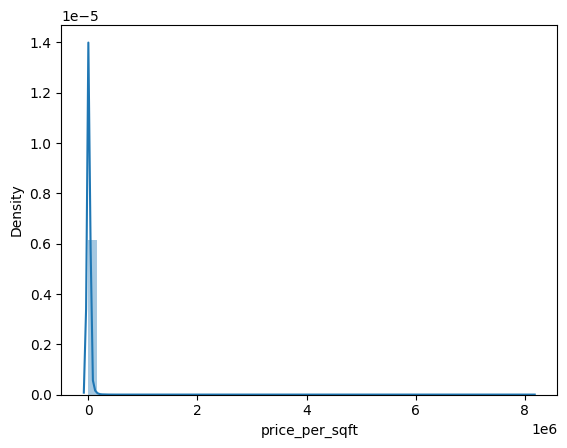

In [376]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

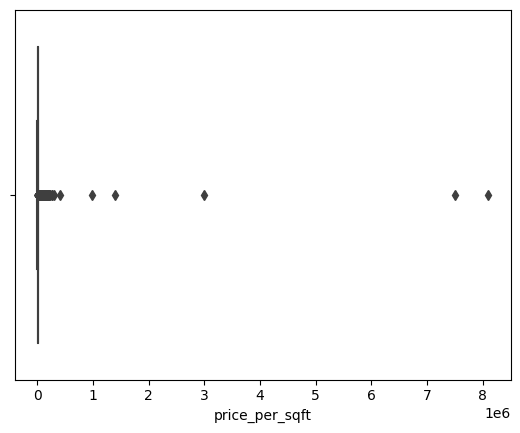

In [377]:
sns.boxplot(x=df['price_per_sqft'])

In [378]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.80)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(464,
 count    4.640000e+02
 mean     1.029562e+05
 std      5.326021e+05
 min      2.039400e+04
 25%      2.896675e+04
 50%      4.240350e+04
 75%      7.402500e+04
 max      8.100000e+06
 Name: price_per_sqft, dtype: float64)

In [379]:
# outliers_sqft.to_csv('temp.csv')

In [380]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1200 else x)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\3310256366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1200 else x)


In [381]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [382]:
outliers_sqft['price_per_sqft'].describe()

count       464.000000
mean      13403.415948
std       59684.446068
min        2252.000000
25%        3569.750000
50%        5556.000000
75%       10007.750000
max      900000.000000
Name: price_per_sqft, dtype: float64

In [383]:
df.update(outliers_sqft)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

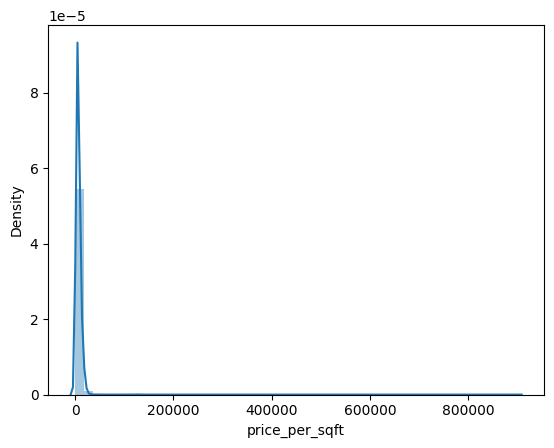

In [384]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

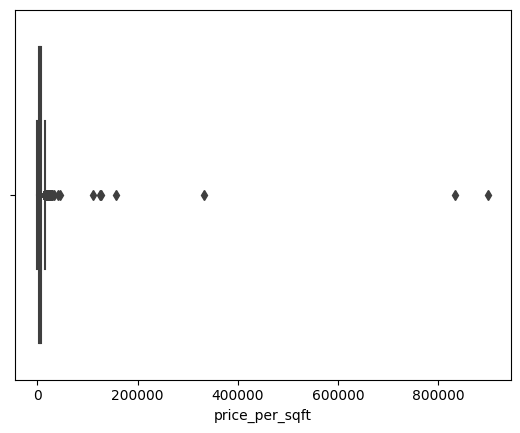

In [385]:
sns.boxplot(x=df['price_per_sqft'])

In [386]:
df[df['price_per_sqft']>30000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
128,flat,satya square,chandkheda,0.81,900000.0,9.0,Carpet area: 1 (0.09 sq.m.),3,3,1,6.0,NaN,Moderately Old,NaN,NaN,1.0,1,1,0,1,0,0,0
170,house,rachana society,satellite,6.51,40185.0,1620.0,Plot area 1620(150.5 sq.m.)Carpet area: 5760 s...,2,2,2,2.0,North-West,Old Property,NaN,NaN,5760.0,1,0,1,1,0,1,156
913,flat,swastik serenity,narol,0.20,111111.0,18.0,Carpet area: 2 (0.19 sq.m.),2,1,2,7.0,South,Relatively New,NaN,NaN,2.0,0,0,0,0,0,0,41
1953,house,nishant ratnaakar verte,south bopal,3.00,833333.0,36.0,Plot area 4(0.37 sq.m.),4,5,3+,4.0,NaN,New Property,NaN,4.00,NaN,0,0,0,0,0,0,0
2717,house,malhar bungalows,shilaj,17.00,124088.0,1370.0,Plot area 1370(127.28 sq.m.),4,5,3+,3.0,East,New Property,NaN,1370.00,NaN,1,1,1,1,0,1,54
3664,house,anurita bungalows,thaltej,22.00,33167.0,6633.0,Plot area 1100(102.19 sq.m.)Carpet area: 737 s...,4,4,3,2.0,East,Under Construction,NaN,NaN,737.0,1,0,1,1,0,0,200
4595,house,arth bunglow,prahlad nagar,1.70,157407.0,108.0,Plot area 1.35(1.13 sq.m.),3,3,1,2.0,NaN,Moderately Old,NaN,12.15,NaN,0,0,0,0,1,1,56
4634,house,independent,vastral,4.26,45079.0,945.0,Built Up area: 105 (9.75 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,105.00,NaN,0,0,0,0,0,0,0
4911,house,independent,ctm,0.30,333333.0,9.0,Plot area 1(0.09 sq.m.),1,1,1,1.0,NaN,Old Property,NaN,1.00,NaN,0,0,0,0,0,0,0
5857,house,the north park by adani realty,vaishnodevi circle,18.00,127298.0,1414.0,Plot area 1414(131.36 sq.m.)Built Up area: 105...,5,6,3,2.0,North-East,Under Construction,NaN,1050.00,990.0,1,1,0,1,1,0,147


In [387]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

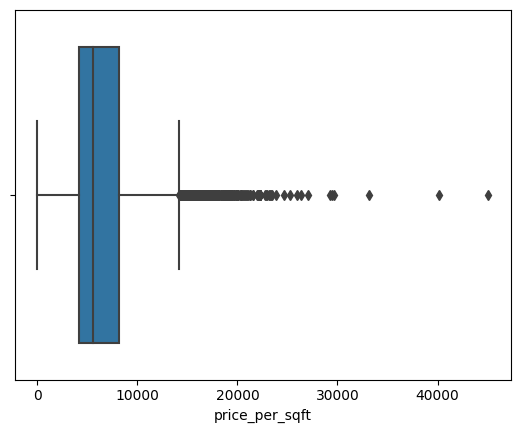

In [388]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

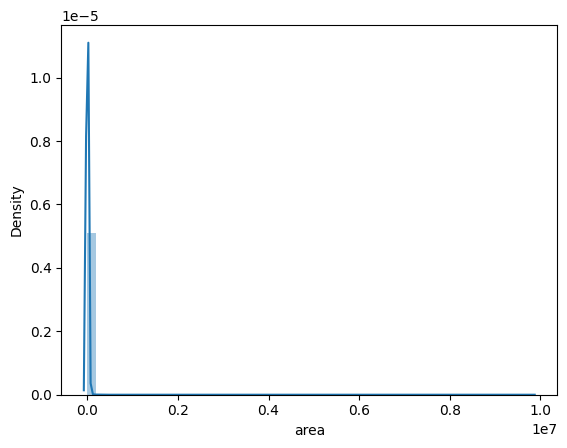

In [389]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

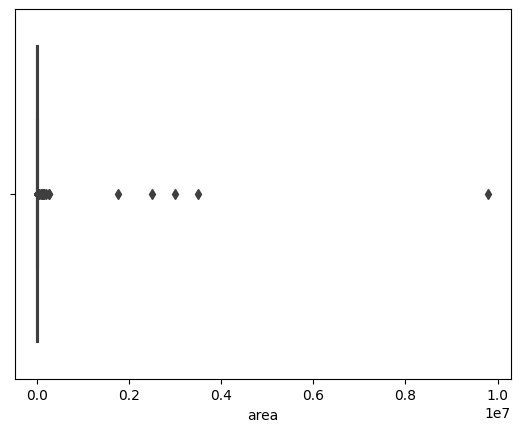

In [390]:
sns.boxplot(x=df['area'])

In [391]:
df['area'].describe()

count    5.914000e+03
mean     5.619527e+03
std      1.463878e+05
min      5.600000e+01
25%      1.044000e+03
50%      1.435000e+03
75%      2.139750e+03
max      9.800000e+06
Name: area, dtype: float64

In [392]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
186,flat,aakruti aangan,vatva,0.15,6.0,250000.0,Carpet area: 23431,1,1,1,2.0,North-East,Moderately Old,NaN,NaN,2.343100e+04,0,0,0,0,0,0,46
704,flat,vision madhuvan glory,nava naroda,0.32,24.0,133333.0,Super Built up area 125(12500 sq.m.)Built Up a...,2,2,3,2.0,West,Moderately Old,125.0,120.0,9.000000e+01,0,0,0,1,0,0,23
858,flat,parshwanath metrocity,chandkheda,0.98,1.0,9800000.0,Super Built up area 1665210(1392327.64 sq.m.),3,3,3,1.0,North,Moderately Old,1665210.0,NaN,NaN,0,0,0,0,1,0,31
1165,house,sudama homes 2,nana chiloda,1.50,115.0,130435.0,Plot area 3(12140.58 sq.m.),4,4,2,1.0,NaN,Relatively New,NaN,3.0,NaN,0,0,0,0,0,0,0
1372,flat,avirat silver habitat,odhav,0.30,1.0,3000000.0,Carpet area: 121 (489670.06 sq.m.),2,2,1,2.0,NaN,Relatively New,NaN,NaN,1.210000e+02,0,0,0,0,0,0,22
2284,flat,507 nandanvan recidency aslali highway,narol,0.25,1.0,2500000.0,Carpet area: 2000000 (185806.08 sq.m.),1,2,1,5.0,NaN,Relatively New,NaN,NaN,2.000000e+06,0,0,0,0,0,0,0
3223,flat,olive greens,gota,1.25,114.0,109649.0,Carpet area: 109524 (10175.11 sq.m.),3,3,1,6.0,West,Relatively New,NaN,NaN,1.095240e+05,1,1,0,1,1,0,53
3512,flat,vision madhuvan glory,nava naroda,0.32,25.0,128000.0,Super Built up area 120(12000 sq.m.)Built Up a...,2,2,3,2.0,NaN,Moderately Old,120.0,100.0,9.000000e+01,0,0,0,1,0,0,31
3572,flat,mahadev shreenand city 6,new maninagar,0.39,21.0,185714.0,Carpet area: 75.77 (16894.25 sq.m.),2,2,2,5.0,NaN,Moderately Old,NaN,NaN,1.818480e+05,0,0,0,0,0,2,16
4892,house,independent,sarkhej,0.70,2.0,3500000.0,Plot area 99(400639.14 sq.m.),3,3,1,1.0,South-West,New Property,NaN,99.0,NaN,0,0,0,0,0,0,0


In [393]:
df = df[df['area'] < 100000]

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

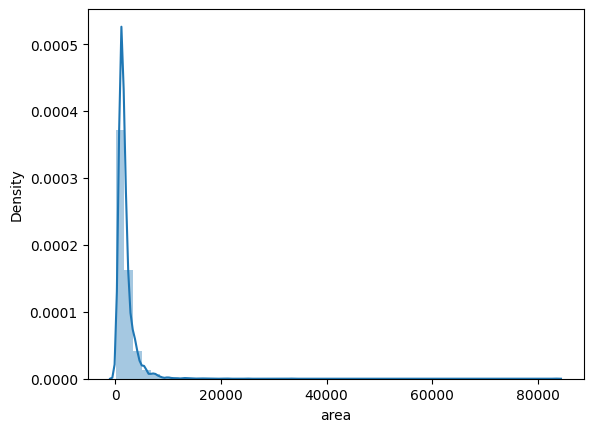

In [394]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

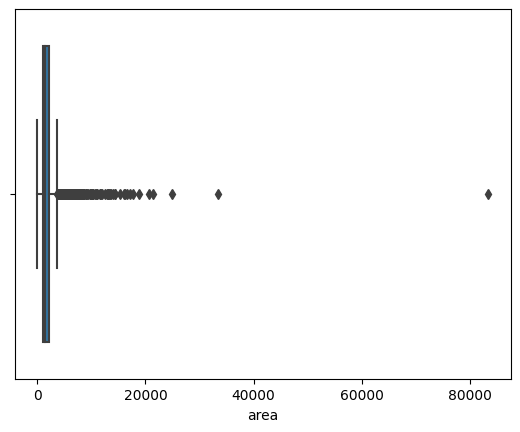

In [395]:
sns.boxplot(x=df['area'])

In [396]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
854,flat,amogha by adani realty,vaishnodevi circle,0.80,96.0,83333.0,Carpet area: 82613 (7675 sq.m.),3,3,1,14.0,NaN,New Property,NaN,NaN,82613.0,0,0,0,0,0,0,110
3912,house,rajeshwari society,ctm,0.32,96.0,33333.0,Built Up area: 33189 (3083.36 sq.m.),1,1,1,2.0,East,Old Property,NaN,33189.0,NaN,0,0,0,0,1,0,8
5408,house,independent,nana chiloda,1.80,720.0,25000.0,Plot area 25000(2322.58 sq.m.),4,2,2,1.0,East,Old Property,NaN,25000.0,NaN,0,0,0,0,0,0,8
2312,flat,s r shivalay heights,motera,7.83,3672.0,21324.0,Carpet area: 21333 (1981.9 sq.m.),2,2,1,1.0,NaN,New Property,NaN,NaN,21333.0,0,0,0,0,0,0,0
3042,house,independent,nava naroda,2.25,1087.0,20699.0,Plot area 2300(1923.09 sq.m.),4,5,2,3.0,NaN,Moderately Old,NaN,20700.0,NaN,0,0,0,0,0,0,0
513,flat,status 55,science city,1.66,878.0,18907.0,Built Up area: 2376 (1986.64 sq.m.)Carpet area...,3,3,3,8.0,West,New Property,NaN,2376.0,2100.0,1,0,1,1,0,0,204
4869,flat,vishnudhara garden,gota,1.00,566.0,17668.0,Carpet area: 1962 (1640.48 sq.m.),3,2,2,1.0,North,New Property,NaN,NaN,1962.0,1,0,1,1,0,0,169
2422,house,independent,thaltej,2.50,1456.0,17170.0,Plot area 1908(1595.33 sq.m.),4,4,1,1.0,East,Relatively New,NaN,17172.0,NaN,1,0,1,1,0,2,104
2781,house,neelkanth greens villa,thaltej,20.00,12005.0,16660.0,Plot area 1851(1547.67 sq.m.)Built Up area: 70...,4,4,1,3.0,East,Moderately Old,NaN,700.0,NaN,0,0,1,1,0,1,105
1520,flat,avirat silver harmony 2,gota,1.08,663.0,16290.0,Built Up area: 2115 Carpet area: 1515 sq.m.,3,3,2,3.0,West,Under Construction,NaN,2115.0,1515.0,1,0,0,1,0,0,124


In [397]:
# df.drop(index=[1663, 972, 5887, 5254, 2106, 3794], inplace=True)

In [400]:
temp = df[df['area'] > 10000].sort_values('area',ascending=False)
temp[['price','area','super_built_up_area','built_up_area','carpet_area','areaWithType']]

,price,area,super_built_up_area,built_up_area,carpet_area,areaWithType
854,0.80,83333.0,NaN,NaN,82613.0,Carpet area: 82613 (7675 sq.m.)
3912,0.32,33333.0,NaN,33189.0,NaN,Built Up area: 33189 (3083.36 sq.m.)
5408,1.80,25000.0,NaN,25000.0,NaN,Plot area 25000(2322.58 sq.m.)
2312,7.83,21324.0,NaN,NaN,21333.0,Carpet area: 21333 (1981.9 sq.m.)
3042,2.25,20699.0,NaN,20700.0,NaN,Plot area 2300(1923.09 sq.m.)
2422,2.50,17170.0,NaN,17172.0,NaN,Plot area 1908(1595.33 sq.m.)
2781,20.00,16660.0,NaN,700.0,NaN,Plot area 1851(1547.67 sq.m.)Built Up area: 70...
1619,19.20,16000.0,16000.0,NaN,NaN,Super Built up area 16000(1486.45 sq.m.)
2431,9.51,14473.0,NaN,750.0,NaN,Plot area 1608(1344.49 sq.m.)Built Up area: 75...
5289,9.25,14399.0,NaN,14400.0,NaN,Plot area 1600(1337.8 sq.m.)


In [399]:
df.loc[513,'area'] = 2376.0
df.loc[4869,'area'] = 2400.0
# df.loc[2781,'area'] = 700.0
# df.loc[2431,'area'] = 750.0
df.loc[1520,'area'] = 2115.0
# df.loc[4664,'area'] = 560.0
# df.loc[221,'area'] = 870.0
df.loc[5496,'area'] = 1010.0
df.loc[4675,'area'] = 1010.0
df.loc[4654,'area'] = 1700.0
df.loc[4423,'area'] = 2000.0

# df.loc[136,'area'] = 1350.0
# df.loc[5067,'area'] = 1300.0
# df.loc[1890,'area'] = 1130.0

# df.loc[1612,'area'] = 1390.0
# df.loc[3242,'area'] = 1400.0

df.loc[3609,'area'] = 916.0
df.loc[652,'area'] = 1090.0
df.loc[886,'area'] = 900.0
df.loc[4746,'area'] = 900.0

In [141]:
# temp['built_up_area'] = temp['area']

In [401]:
df = df[df['area']<17000]

In [402]:
# df.update(temp)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

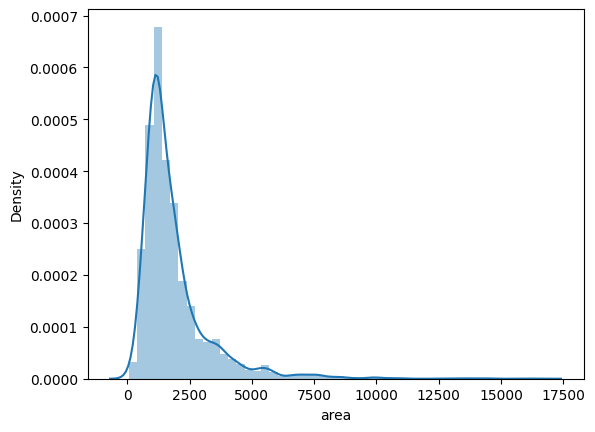

In [403]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

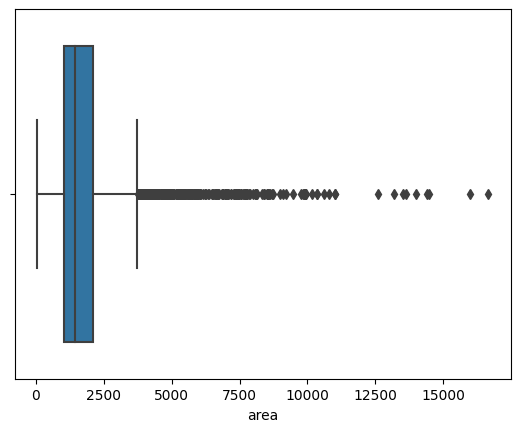

In [404]:
sns.boxplot(x=df['area'])

In [405]:
df['area'].describe()

count     5894.000000
mean      1850.846454
std       1427.619777
min         56.000000
25%       1042.000000
50%       1430.000000
75%       2115.000000
max      16660.000000
Name: area, dtype: float64

### Bedroom

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

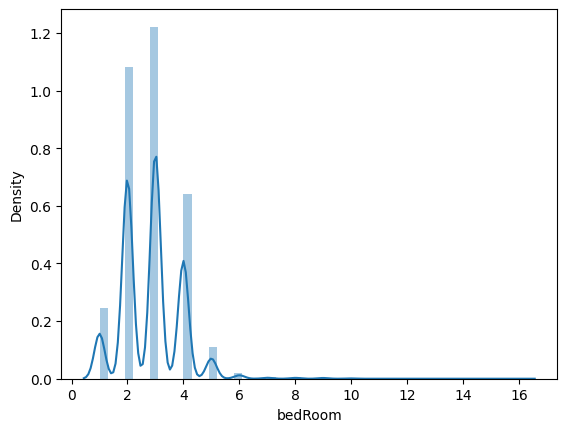

In [406]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

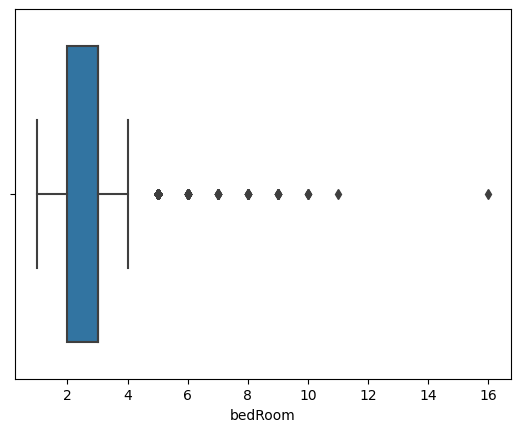

In [407]:
sns.boxplot(x=df['bedRoom'])

In [408]:
df['bedRoom'].describe()

count    5894.000000
mean        2.830166
std         1.062528
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        16.000000
Name: bedRoom, dtype: float64

In [409]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2805,house,independent,sarkhej,2.0,11111.0,1800.0,Plot area 1800(167.23 sq.m.),16,16,3+,3.0,South-West,Old Property,NaN,1800.0,NaN,1,1,0,1,1,1,55
3940,flat,mangalam flats,bapunagar,1.1,4074.0,2700.0,Carpet area: 300 (27.87 sq.m.),11,7,3,0.0,North-East,Old Property,NaN,NaN,300.0,0,0,0,0,0,0,38


In [410]:
df = df[df['bedRoom'] <= 10]

In [411]:
df.shape

(5892, 23)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

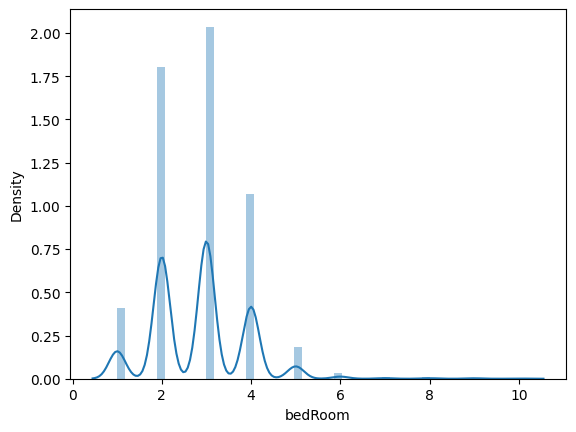

In [412]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

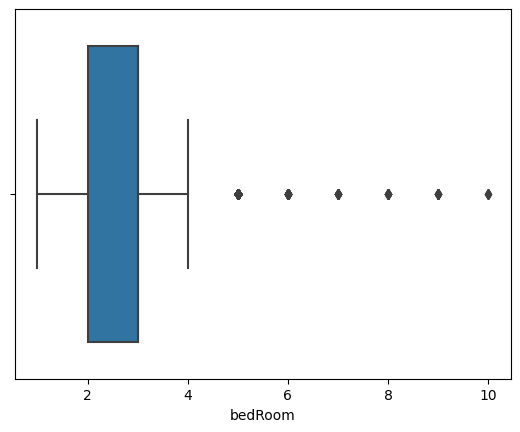

In [413]:
sns.boxplot(x=df['bedRoom'])

In [414]:
df['bedRoom'].describe()

count    5892.000000
mean        2.826544
std         1.043343
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

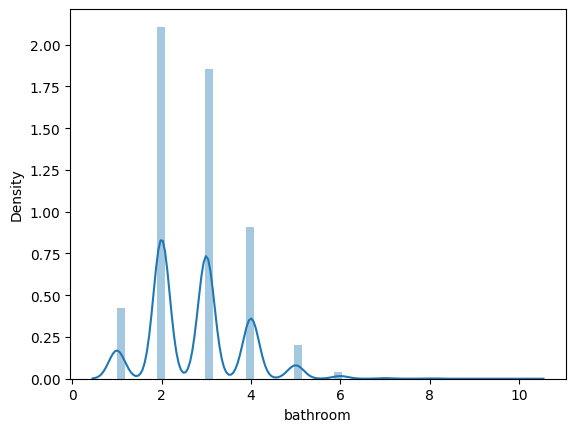

In [415]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

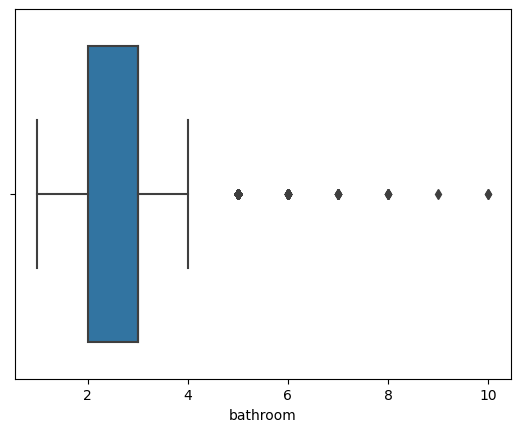

In [416]:
sns.boxplot(x=df['bathroom'])

In [417]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [418]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9313.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16049.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5666.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


### super built up area

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

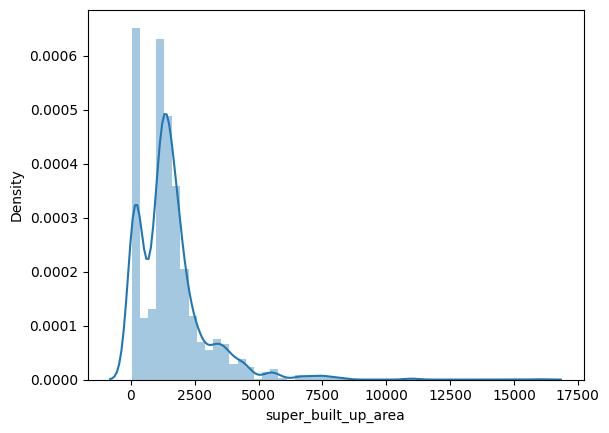

In [419]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

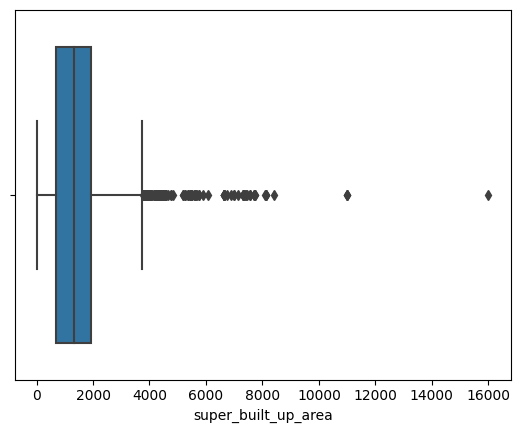

In [420]:
sns.boxplot(x=df['super_built_up_area'])

In [421]:
df['super_built_up_area'].describe()

count     2511.000000
mean      1548.585631
std       1339.954281
min         30.000000
25%        684.000000
50%       1341.000000
75%       1917.500000
max      16000.000000
Name: super_built_up_area, dtype: float64

In [422]:
df[df['super_built_up_area'] <100]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
79,flat,valkeshwar flora,nava naroda,0.27,6522.0,414.0,Super Built up area 71(59.37 sq.m.)Carpet area...,1,2,1,7.0,East,Relatively New,71.00,NaN,46.00,0,0,1,0,0,0,51
114,flat,prathna lavish,gota,0.30,4504.0,666.0,Super Built up area 74(61.87 sq.m.)Built Up ar...,1,1,0,7.0,East,Relatively New,74.00,60.00,50.00,0,0,0,0,0,0,156
277,flat,kaushalam residency,gota,0.35,6774.0,517.0,Super Built up area 89(74.42 sq.m.)Carpet area...,1,2,1,5.0,East,Moderately Old,89.00,NaN,57.00,0,0,1,0,0,0,51
296,flat,narnarayan akshardham heights,vastral,0.20,2554.0,783.0,Super Built up area 85(7.9 sq.m.),1,1,0,6.0,NaN,Relatively New,85.00,NaN,NaN,0,0,0,0,0,0,0
387,flat,ozone glitter,naroda,0.17,2361.0,720.0,Super Built up area 82(7.62 sq.m.),1,1,1,5.0,South-West,Relatively New,82.00,NaN,NaN,0,0,0,0,0,0,39
448,flat,satatya avenue,new ranip,0.27,4000.0,675.0,Super Built up area 75(62.71 sq.m.)Built Up ar...,2,2,1,4.0,North-West,Relatively New,75.00,65.00,60.00,0,0,0,0,1,2,0
469,flat,swaminarayan park,nava naroda,0.26,3031.0,858.0,Super Built up area 91.95,2,2,3,1.0,NaN,Moderately Old,91.95,NaN,NaN,0,0,0,0,0,0,0
495,flat,satej homes,vatva,0.15,2026.0,740.0,Super Built up area 85(71.07 sq.m.)Built Up ar...,2,2,2,2.0,East,Moderately Old,85.00,72.00,70.00,0,0,0,0,1,0,61
871,flat,aroma aakruti apartment,vastral,0.07,1720.0,407.0,Super Built up area 42(35.12 sq.m.),1,1,1,2.0,NaN,Moderately Old,42.00,NaN,NaN,0,0,0,0,0,0,0
1000,flat,safal apart,naranpura,0.57,7565.0,753.0,Super Built up area 70,2,2,1,3.0,NaN,Old Property,70.00,NaN,NaN,0,0,0,0,0,2,0


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

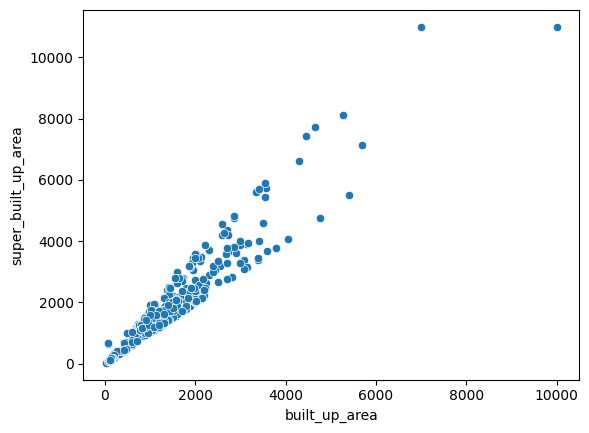

In [423]:
sns.scatterplot(df,x='built_up_area',y='super_built_up_area')

### built up area

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

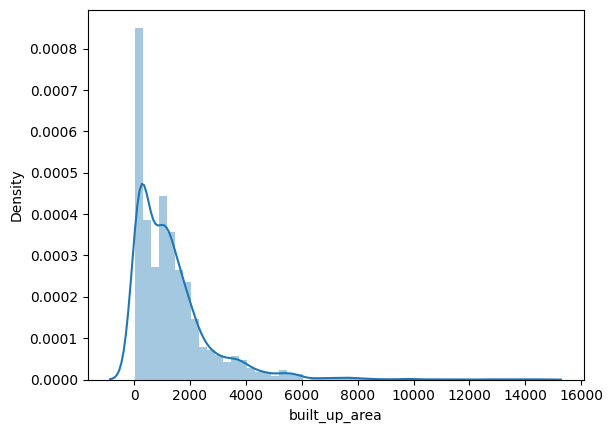

In [424]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

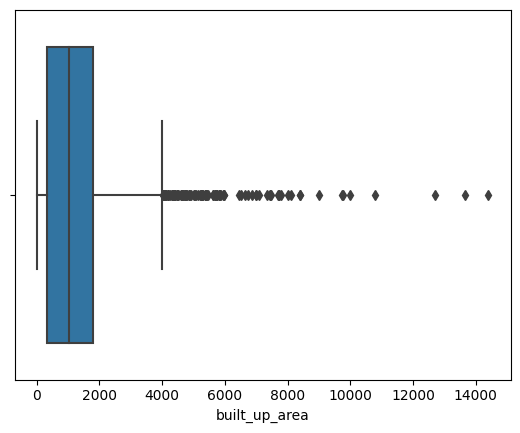

In [425]:
sns.boxplot(x=df['built_up_area'])

In [426]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2763,house,independentdanbag bunglow,shela,10.00,9259.0,10800.0,Plot area 1200(1003.35 sq.m.),4,4,2,2.0,North-East,Old Property,NaN,10800.0,NaN,1,1,0,1,0,2,95
3180,flat,upcoming new project,bodakdev,13.34,19090.0,6988.0,Built Up area: 12700 (1179.87 sq.m.)Carpet are...,5,5,2,6.0,East,Under Construction,NaN,12700.0,6985.0,1,1,1,1,0,0,213
4914,house,independent,shela,11.50,8430.0,13642.0,Plot area 13641(1267.29 sq.m.),3,3,1,1.0,North,Moderately Old,NaN,13641.0,NaN,0,0,1,1,0,2,82
5289,house,bakeri serendeep mansion,ghuma,9.25,6424.0,14399.0,Plot area 1600(1337.8 sq.m.),4,4,2,4.0,East,Moderately Old,NaN,14400.0,NaN,1,1,1,1,0,0,39


### carpet area

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

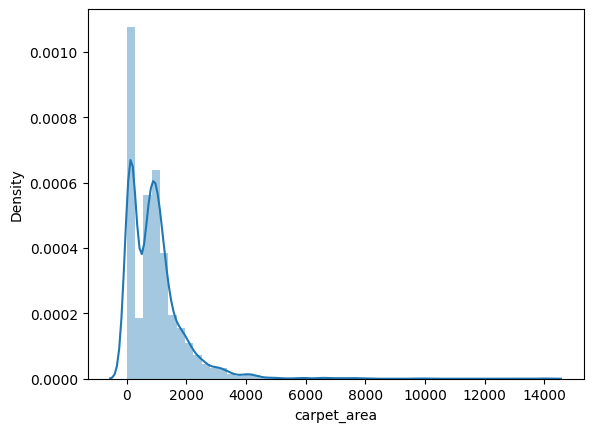

In [427]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

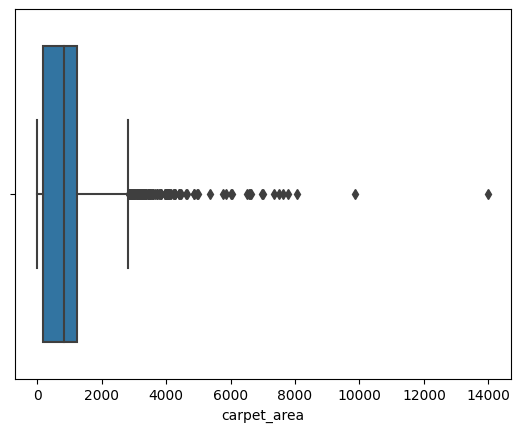

In [428]:
sns.boxplot(x=df['carpet_area'])

In [429]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2875,flat,ikebana,bodakdev,14.7,10500.0,14000.0,Carpet area: 14000 (1300.64 sq.m.),6,7,2,16.0,East,Under Construction,NaN,NaN,14000.0,1,1,1,1,0,0,253


In [430]:
df.loc[2875,'carpet_area'] = 5000
df.loc[2875,'area'] = 5000

In [431]:
# df.drop(index=[2312],inplace=True)

In [432]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9313.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16049.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5666.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

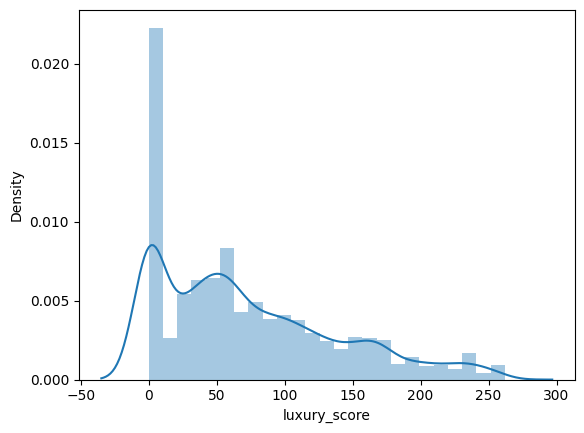

In [433]:
sns.distplot(df['luxury_score'])

<Axes: >

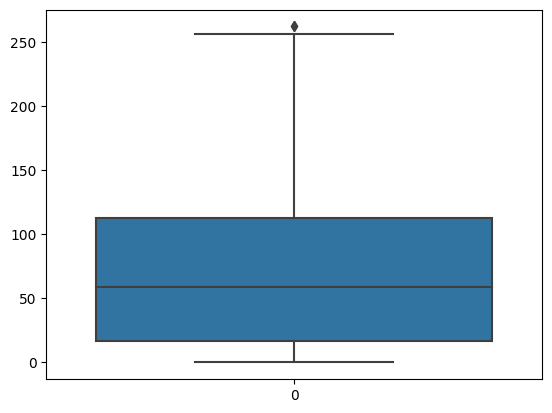

In [434]:
sns.boxplot(df['luxury_score'])

In [435]:
df.shape

(5892, 23)

In [436]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [437]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9317.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16048.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


C:\Users\Arpit\AppData\Local\Temp\ipykernel_6928\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

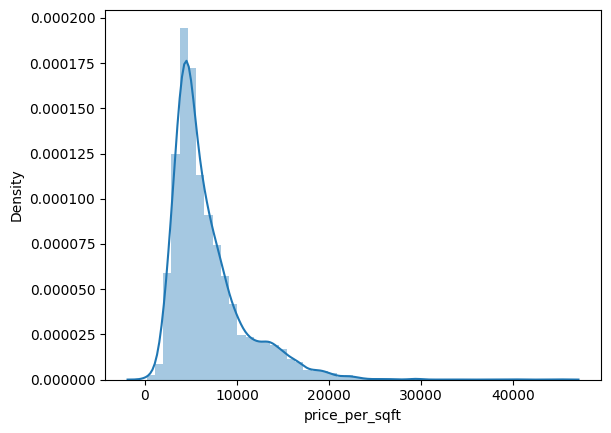

In [438]:
sns.distplot(df['price_per_sqft'])

<Axes: >

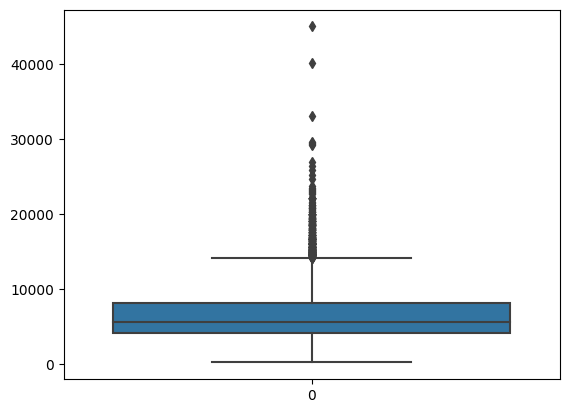

In [439]:
sns.boxplot(df['price_per_sqft'])

In [441]:
df[df['price_per_sqft'] > 35000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
170,house,rachana society,satellite,6.51,40185.0,1620.0,Plot area 1620(150.5 sq.m.)Carpet area: 5760 s...,2,2,2,2.0,North-West,Old Property,NaN,NaN,5760.0,1,0,1,1,0,1,156
4634,house,independent,vastral,4.26,45079.0,945.0,Built Up area: 105 (9.75 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,105.0,NaN,0,0,0,0,0,0,0


In [361]:
temp = df[df['price_per_sqft'] > 40000]

In [184]:
# temp.to_csv('temp.csv')

In [442]:
df.drop(index=[170,4634],inplace=True)

In [443]:
# df['area'] = df.apply(lambda row: row['area']*9 if row['price_per_sqft']>42000 else row['area'], axis=1)

In [444]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

<Axes: >

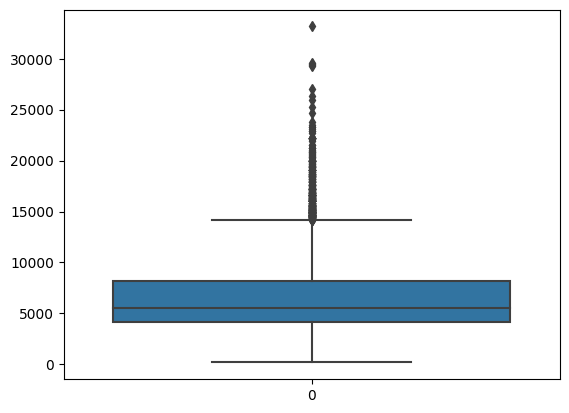

In [445]:
sns.boxplot(df['price_per_sqft'])

In [446]:
df['ratio'] = df['area']/df['bedRoom']

In [447]:
df_house = df[df['property_type']=='house']
df_flat = df[df['property_type']=='flat']

In [448]:
x = df_house[df_house['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

225.0

In [449]:
x = df_flat[df_flat['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

268.46666666666664

In [450]:
house_outliar = df_house[df_house['ratio']<180]
flat_outliar = df_flat[df_flat['ratio']<268]

In [451]:
# flat_outliar.to_csv('temp_1.csv')
# house_outliar.to_csv('temp_2.csv')

In [452]:
# after analysing above data number we choose
house_outliar = df_house[df_house['ratio']<200]
flat_outliar = df_flat[df_flat['ratio']<170]

In [453]:
df.drop(index=flat_outliar.index.to_list(),inplace=True)
df.drop(index=house_outliar.index.to_list(),inplace=True)

In [454]:
# df.to_csv('temp.csv')

In [455]:
df.drop(columns='ratio',inplace=True)

In [456]:
df.shape

(5829, 23)

In [457]:
df.to_csv(out_path / 'properties_outlier_treated.csv',index=False)